<a href="https://colab.research.google.com/github/HughClaimsend/MA5851_HughMcMullan_A3/blob/main/MA5851_Hugh_McMullan_Part5_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import pandas as pd
import numpy as np
import re

from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

# Install the VADER sentiment analysis library
!pip install vaderSentiment
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [47]:
# The data files are located on the Google Drive, so do a drive.mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [50]:
# Read in the COMMERCIAL posts data, created in the Part 2 notebook
dfCommercial = pd.read_csv('/content/drive/MyDrive/DronePostsCommercial_202112051330.csv')
display(dfCommercial)

,Unnamed: 0,Unnamed: 0.1,dronesite_group,thread_name,post_YYMM,post_YYYY,post_text,target_text,cleaned_text,tokenized_text,stemmed_text
0,5052,5953,Commercial,What is the process of ReOC,2106,2021,Hi Guys. Im new here. I just enrolled the RePL...,What is the process of ReOC Hi Guys. Im new he...,process reoc hi guys im new enrolled repl reoc...,"['process', 'reoc', 'hi', 'guys', 'im', 'new',...","['process', 'reoc', 'hi', 'guy', 'im', 'new', ..."
1,5053,5954,Commercial,What is the process of ReOC,2106,2021,\n\nSteveChan said:\n\n\n\n\t\t\tHi Guys. Im n...,What is the process of ReOC \n\nSteveChan said...,process reoc stevechan said hi guys im new enr...,"['process', 'reoc', 'stevechan', 'said', 'hi',...","['process', 'reoc', 'stevechan', 'said', 'hi',..."
2,5054,5955,Commercial,What is the process of ReOC,2106,2021,"Given that this is an international forum, the...",What is the process of ReOC Given that this is...,process reoc given international forum minimum...,"['process', 'reoc', 'given', 'international', ...","['process', 'reoc', 'given', 'intern', 'forum'..."
3,5055,5956,Commercial,What is the process of ReOC,2106,2021,Mate there are documents that you can use on t...,What is the process of ReOC Mate there are doc...,process reoc mate documents use casa website c...,"['process', 'reoc', 'mate', 'documents', 'use'...","['process', 'reoc', 'mate', 'document', 'use',..."
4,5056,5957,Commercial,What is the process of ReOC,2106,2021,Hi Guys. Im new here. I just enrolled the RePL...,What is the process of ReOC Hi Guys. Im new he...,process reoc hi guys im new enrolled repl reoc...,"['process', 'reoc', 'hi', 'guys', 'im', 'new',...","['process', 'reoc', 'hi', 'guy', 'im', 'new', ..."
...,...,...,...,...,...,...,...,...,...,...,...
2610,7663,12146,Commercial,Litchi wapoint missions,2007,2020,Would anyone be interested in flying gently cu...,Litchi wapoint missions Would anyone be intere...,litchi wapoint missions would anyone intereste...,"['litchi', 'wapoint', 'missions', 'would', 'an...","['litchi', 'wapoint', 'mission', 'would', 'any..."
2611,7664,12200,Commercial,Beseno Castle in 6K,1903,2019,\n\n\n\n\nCastel Beseno is an impressive fortr...,Beseno Castle in 6K \n\n\n\n\nCastel Beseno is...,beseno castle 6k castel beseno impressive fort...,"['beseno', 'castle', 'castel', 'beseno', 'impr...","['beseno', 'castl', 'castel', 'beseno', 'impre..."
2612,7665,12457,Commercial,Val Formazza Mountains and a stunning Waterfal...,1804,2018,\n\n\n\nAerial footage of one of Italy's hidde...,Val Formazza Mountains and a stunning Waterfal...,val formazza mountains stunning waterfall cine...,"['val', 'formazza', 'mountains', 'stunning', '...","['val', 'formazza', 'mountain', 'stun', 'water..."
2613,7666,12458,Commercial,Val Formazza Mountains and a stunning Waterfal...,1804,2018,"As always, your video is stunning. As good as ...",Val Formazza Mountains and a stunning Waterfal...,val formazza mountains stunning waterfall cine...,"['val', 'formazza', 'mountains', 'stunning', '...","['val', 'formazza', 'mountain', 'stun', 'water..."


In [51]:
# Read in the COMMERCIAL posts data, created in the Part 2 notebook
dfPrivate = pd.read_csv('/content/drive/MyDrive/DronePostsPrivate_202112051330.csv')
display(dfPrivate)

,Unnamed: 0,Unnamed: 0.1,dronesite_group,thread_name,post_YYMM,post_YYYY,post_text,target_text,cleaned_text,tokenized_text,stemmed_text
0,0,0,Private,Latest CASA newsletter re VLOS,2110,2021,..\nLatest CASA newsletter has VLOS article wh...,Latest CASA newsletter re VLOS ..\nLatest CASA...,latest casa newsletter vlos latest casa newsle...,"['latest', 'casa', 'newsletter', 'vlos', 'late...","['latest', 'casa', 'newslett', 'vlo', 'latest'..."
1,1,1,Private,Latest CASA newsletter re VLOS,2110,2021,I'm guessing they're making a distinction betw...,Latest CASA newsletter re VLOS I'm guessing th...,latest casa newsletter vlos guessing making di...,"['latest', 'casa', 'newsletter', 'vlos', 'gues...","['latest', 'casa', 'newslett', 'vlo', 'guess',..."
2,2,2,Private,Latest CASA newsletter re VLOS,2110,2021,"If it’s like the US, the expectation is to use...",Latest CASA newsletter re VLOS If it’s like th...,latest casa newsletter vlos like us expectatio...,"['latest', 'casa', 'newsletter', 'vlos', 'like...","['latest', 'casa', 'newslett', 'vlo', 'like', ..."
3,3,3,Private,Latest CASA newsletter re VLOS,2110,2021,CASA is not trying to tell us to keep our eyes...,Latest CASA newsletter re VLOS CASA is not try...,latest casa newsletter vlos casa trying tell u...,"['latest', 'casa', 'newsletter', 'vlos', 'casa...","['latest', 'casa', 'newslett', 'vlo', 'casa', ..."
4,4,4,Private,Latest CASA newsletter re VLOS,2110,2021,\n\nthispilothere said:\n\n\n\nI'm guessing th...,Latest CASA newsletter re VLOS \n\nthispilothe...,latest casa newsletter vlos thispilothere said...,"['latest', 'casa', 'newsletter', 'vlos', 'this...","['latest', 'casa', 'newslett', 'vlo', 'thispil..."
...,...,...,...,...,...,...,...,...,...,...,...
5047,5047,5926,Private,[Question] CASA permit for FPV drones in Austr...,2103,2021,Yeah nah you need to have a REPL licence etc a...,[Question] CASA permit for FPV drones in Austr...,question casa permit fpv drones australia yeah...,"['question', 'casa', 'permit', 'fpv', 'drones'...","['question', 'casa', 'permit', 'fpv', 'drone',..."
5048,5048,5927,Private,[Question] CASA permit for FPV drones in Austr...,2103,2021,Actually I just double checked. Anyone can app...,[Question] CASA permit for FPV drones in Austr...,question casa permit fpv drones australia actu...,"['question', 'casa', 'permit', 'fpv', 'drones'...","['question', 'casa', 'permit', 'fpv', 'drone',..."
5049,5049,5939,Private,[Question] CASA permit for FPV drones in Austr...,2103,2021,I understand that to fly FPV in Australia you ...,[Question] CASA permit for FPV drones in Austr...,question casa permit fpv drones australia unde...,"['question', 'casa', 'permit', 'fpv', 'drones'...","['question', 'casa', 'permit', 'fpv', 'drone',..."
5050,5050,5940,Private,[Question] CASA permit for FPV drones in Austr...,2103,2021,Yeah nah you need to have a REPL licence etc a...,[Question] CASA permit for FPV drones in Austr...,question casa permit fpv drones australia yeah...,"['question', 'casa', 'permit', 'fpv', 'drones'...","['question', 'casa', 'permit', 'fpv', 'drone',..."


**Different pre-processing for VADER library requirements**

(1) using sentences, not tokens;

(2) so leave punctuation in place;

(3) VADER removes stopwords itself, so do not need to do that explicitly;

(4) don't lowercase text, because capitals matter for sentiment analyses;

(5) just remove "\n" characters.

In [57]:
# NLTK constants
PATTERN_N = re.compile("\n")            #matches `\r` and `\n`

In [58]:
# function for text cleaning 
def vader_clean_text_using_nltk(text):
    text = re.sub(PATTERN_N, ' ', text)     # Remove escaped \n characters
    return text

# Apply the text cleaning function to the target_text in dfCommercial and dfPrivate
dfCommercial['vader_ready_text'] = dfCommercial['target_text'].apply(lambda s: vader_clean_text_using_nltk(s))
dfPrivate['vader_ready_text'] = dfPrivate['target_text'].apply(lambda s: vader_clean_text_using_nltk(s))
display(dfPrivate)


,Unnamed: 0,Unnamed: 0.1,dronesite_group,thread_name,post_YYMM,post_YYYY,post_text,target_text,cleaned_text,tokenized_text,stemmed_text,vader_ready_text
0,0,0,Private,Latest CASA newsletter re VLOS,2110,2021,..\nLatest CASA newsletter has VLOS article wh...,Latest CASA newsletter re VLOS ..\nLatest CASA...,latest casa newsletter vlos latest casa newsle...,"['latest', 'casa', 'newsletter', 'vlos', 'late...","['latest', 'casa', 'newslett', 'vlo', 'latest'...",Latest CASA newsletter re VLOS .. Latest CASA ...
1,1,1,Private,Latest CASA newsletter re VLOS,2110,2021,I'm guessing they're making a distinction betw...,Latest CASA newsletter re VLOS I'm guessing th...,latest casa newsletter vlos guessing making di...,"['latest', 'casa', 'newsletter', 'vlos', 'gues...","['latest', 'casa', 'newslett', 'vlo', 'guess',...",Latest CASA newsletter re VLOS I'm guessing th...
2,2,2,Private,Latest CASA newsletter re VLOS,2110,2021,"If it’s like the US, the expectation is to use...",Latest CASA newsletter re VLOS If it’s like th...,latest casa newsletter vlos like us expectatio...,"['latest', 'casa', 'newsletter', 'vlos', 'like...","['latest', 'casa', 'newslett', 'vlo', 'like', ...",Latest CASA newsletter re VLOS If it’s like th...
3,3,3,Private,Latest CASA newsletter re VLOS,2110,2021,CASA is not trying to tell us to keep our eyes...,Latest CASA newsletter re VLOS CASA is not try...,latest casa newsletter vlos casa trying tell u...,"['latest', 'casa', 'newsletter', 'vlos', 'casa...","['latest', 'casa', 'newslett', 'vlo', 'casa', ...",Latest CASA newsletter re VLOS CASA is not try...
4,4,4,Private,Latest CASA newsletter re VLOS,2110,2021,\n\nthispilothere said:\n\n\n\nI'm guessing th...,Latest CASA newsletter re VLOS \n\nthispilothe...,latest casa newsletter vlos thispilothere said...,"['latest', 'casa', 'newsletter', 'vlos', 'this...","['latest', 'casa', 'newslett', 'vlo', 'thispil...",Latest CASA newsletter re VLOS thispilothere...
...,...,...,...,...,...,...,...,...,...,...,...,...
5047,5047,5926,Private,[Question] CASA permit for FPV drones in Austr...,2103,2021,Yeah nah you need to have a REPL licence etc a...,[Question] CASA permit for FPV drones in Austr...,question casa permit fpv drones australia yeah...,"['question', 'casa', 'permit', 'fpv', 'drones'...","['question', 'casa', 'permit', 'fpv', 'drone',...",[Question] CASA permit for FPV drones in Austr...
5048,5048,5927,Private,[Question] CASA permit for FPV drones in Austr...,2103,2021,Actually I just double checked. Anyone can app...,[Question] CASA permit for FPV drones in Austr...,question casa permit fpv drones australia actu...,"['question', 'casa', 'permit', 'fpv', 'drones'...","['question', 'casa', 'permit', 'fpv', 'drone',...",[Question] CASA permit for FPV drones in Austr...
5049,5049,5939,Private,[Question] CASA permit for FPV drones in Austr...,2103,2021,I understand that to fly FPV in Australia you ...,[Question] CASA permit for FPV drones in Austr...,question casa permit fpv drones australia unde...,"['question', 'casa', 'permit', 'fpv', 'drones'...","['question', 'casa', 'permit', 'fpv', 'drone',...",[Question] CASA permit for FPV drones in Austr...
5050,5050,5940,Private,[Question] CASA permit for FPV drones in Austr...,2103,2021,Yeah nah you need to have a REPL licence etc a...,[Question] CASA permit for FPV drones in Austr...,question casa permit fpv drones australia yeah...,"['question', 'casa', 'permit', 'fpv', 'drones'...","['question', 'casa', 'permit', 'fpv', 'drone',...",[Question] CASA permit for FPV drones in Austr...


**Apply VADER functionality to add Sentiment score to eeach row in dfCommercial and dfPrivate**

In [33]:
# Instantiate the VADER SentimentIntensityAnalyzer
vsia = SentimentIntensityAnalyzer()

In [34]:
# function to score a sentence
def sentiment_analyzer_sentence_score(sentence):
    score = vsia.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

text = "THe Swans are the best team ever"
sentiment_analyzer_sentence_score(text) 

text = "The Swans are the best team ever!"
sentiment_analyzer_sentence_score(text)

text = "The Swans are the BEST team ever!"
sentiment_analyzer_sentence_score(text)

text = "The Swans, they are the BEST team ever!"
sentiment_analyzer_sentence_score(text)

text = "The Swans, they are absolutely the BEST team ever!"
sentiment_analyzer_sentence_score(text)

text = "The Swans, they are hardly the BEST team ever!"
sentiment_analyzer_sentence_score(text)

text = "wtf, The Swans, they are hardly the BEST team ever!"
sentiment_analyzer_sentence_score(text)

text = "wtf, those Swans. They are hardly the BEST team ever!"
sentiment_analyzer_sentence_score(text)

THe Swans are the best team ever-------- {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.6369}
The Swans are the best team ever!------- {'neg': 0.0, 'neu': 0.572, 'pos': 0.428, 'compound': 0.6696}
The Swans are the BEST team ever!------- {'neg': 0.0, 'neu': 0.535, 'pos': 0.465, 'compound': 0.7371}
The Swans, they are the BEST team ever!- {'neg': 0.0, 'neu': 0.573, 'pos': 0.427, 'compound': 0.7371}
The Swans, they are absolutely the BEST team ever! {'neg': 0.0, 'neu': 0.592, 'pos': 0.408, 'compound': 0.7582}
The Swans, they are hardly the BEST team ever! {'neg': 0.0, 'neu': 0.618, 'pos': 0.382, 'compound': 0.7137}
wtf, The Swans, they are hardly the BEST team ever! {'neg': 0.227, 'neu': 0.478, 'pos': 0.295, 'compound': 0.2839}
wtf, those Swans. They are hardly the BEST team ever! {'neg': 0.227, 'neu': 0.478, 'pos': 0.295, 'compound': 0.2839}


In [67]:
def split_text_into_sentences(texts):
  sentences = nltk.sent_tokenize(texts)
  return sentences

# text = "Wtf, those Swans. They are definitely the BEST team ever! Just ask them."
# sentences = split_text_into_sentences(text)
# sentences

In [69]:
# function for scoring multiple sentences in a single post
def sentiment_analyzer_multiple_sentences_in_post_score(post):
  sentences = split_text_into_sentences(post)
  scores = []
  for sentence in sentences:
    score = vsia.polarity_scores(sentence)
    scores.append(score['compound'])
    # print(sentence, str(score))
  average_score = sum(scores) / (len(scores) + 0.0001)
  return average_score

# text = "Wtf, those Swans. They are definitely the BEST team ever! Just ask them."
# sentiment_analyzer_multiple_sentences_in_post_score(text)

In [80]:
dfCommercial['sentiment_score'] = dfCommercial['vader_ready_text'].apply(lambda s: sentiment_analyzer_multiple_sentences_in_post_score(s))
dfPrivate['sentiment_score'] = dfPrivate['vader_ready_text'].apply(lambda s: sentiment_analyzer_multiple_sentences_in_post_score(s))
# dfCommercial

In [78]:
# function for assigning sentiment polarity based on compound score
def sentiment_analyzer_polarity_from_score(score):
  polarity = "Neutral"
  if score > 0:
    polarity = "Positive"
  if score < 0:
    polarity = "Negative"
  return polarity

# text = "Those Swans. They are not the BEST team ever! Just ask them."
# score = sentiment_analyzer_multiple_sentences_in_post_score(text)
# polarity = sentiment_analyzer_polarity_from_score(score)
# print(score, polarity)

-0.21239292023599213 Negative


In [81]:
dfCommercial['sentiment_polarity'] = dfCommercial['sentiment_score'].apply(lambda f: sentiment_analyzer_polarity_from_score(f))
dfPrivate['sentiment_polarity'] = dfPrivate['sentiment_score'].apply(lambda f: sentiment_analyzer_polarity_from_score(f))
dfCommercial

,Unnamed: 0,Unnamed: 0.1,dronesite_group,thread_name,post_YYMM,post_YYYY,post_text,target_text,cleaned_text,tokenized_text,stemmed_text,vader_ready_text,sentiment_score,sentiment_polarity
0,5052,5953,Commercial,What is the process of ReOC,2106,2021,Hi Guys. Im new here. I just enrolled the RePL...,What is the process of ReOC Hi Guys. Im new he...,process reoc hi guys im new enrolled repl reoc...,"['process', 'reoc', 'hi', 'guys', 'im', 'new',...","['process', 'reoc', 'hi', 'guy', 'im', 'new', ...",What is the process of ReOC Hi Guys. Im new he...,0.073021,Positive
1,5053,5954,Commercial,What is the process of ReOC,2106,2021,\n\nSteveChan said:\n\n\n\n\t\t\tHi Guys. Im n...,What is the process of ReOC \n\nSteveChan said...,process reoc stevechan said hi guys im new enr...,"['process', 'reoc', 'stevechan', 'said', 'hi',...","['process', 'reoc', 'stevechan', 'said', 'hi',...",What is the process of ReOC SteveChan said: ...,0.104442,Positive
2,5054,5955,Commercial,What is the process of ReOC,2106,2021,"Given that this is an international forum, the...",What is the process of ReOC Given that this is...,process reoc given international forum minimum...,"['process', 'reoc', 'given', 'international', ...","['process', 'reoc', 'given', 'intern', 'forum'...",What is the process of ReOC Given that this is...,0.017199,Positive
3,5055,5956,Commercial,What is the process of ReOC,2106,2021,Mate there are documents that you can use on t...,What is the process of ReOC Mate there are doc...,process reoc mate documents use casa website c...,"['process', 'reoc', 'mate', 'documents', 'use'...","['process', 'reoc', 'mate', 'document', 'use',...",What is the process of ReOC Mate there are doc...,-0.074898,Negative
4,5056,5957,Commercial,What is the process of ReOC,2106,2021,Hi Guys. Im new here. I just enrolled the RePL...,What is the process of ReOC Hi Guys. Im new he...,process reoc hi guys im new enrolled repl reoc...,"['process', 'reoc', 'hi', 'guys', 'im', 'new',...","['process', 'reoc', 'hi', 'guy', 'im', 'new', ...",What is the process of ReOC Hi Guys. Im new he...,0.073021,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2610,7663,12146,Commercial,Litchi wapoint missions,2007,2020,Would anyone be interested in flying gently cu...,Litchi wapoint missions Would anyone be intere...,litchi wapoint missions would anyone intereste...,"['litchi', 'wapoint', 'missions', 'would', 'an...","['litchi', 'wapoint', 'mission', 'would', 'any...",Litchi wapoint missions Would anyone be intere...,0.389131,Positive
2611,7664,12200,Commercial,Beseno Castle in 6K,1903,2019,\n\n\n\n\nCastel Beseno is an impressive fortr...,Beseno Castle in 6K \n\n\n\n\nCastel Beseno is...,beseno castle 6k castel beseno impressive fort...,"['beseno', 'castle', 'castel', 'beseno', 'impr...","['beseno', 'castl', 'castel', 'beseno', 'impre...",Beseno Castle in 6K Castel Beseno is an i...,0.133392,Positive
2612,7665,12457,Commercial,Val Formazza Mountains and a stunning Waterfal...,1804,2018,\n\n\n\nAerial footage of one of Italy's hidde...,Val Formazza Mountains and a stunning Waterfal...,val formazza mountains stunning waterfall cine...,"['val', 'formazza', 'mountains', 'stunning', '...","['val', 'formazza', 'mountain', 'stun', 'water...",Val Formazza Mountains and a stunning Waterfal...,0.261567,Positive
2613,7666,12458,Commercial,Val Formazza Mountains and a stunning Waterfal...,1804,2018,"As always, your video is stunning. As good as ...",Val Formazza Mountains and a stunning Waterfal...,val formazza mountains stunning waterfall cine...,"['val', 'formazza', 'mountains', 'stunning', '...","['val', 'formazza', 'mountain', 'stun', 'water...",Val Formazza Mountains and a stunning Waterfal...,0.662445,Positive


**Report the sentiment by month**

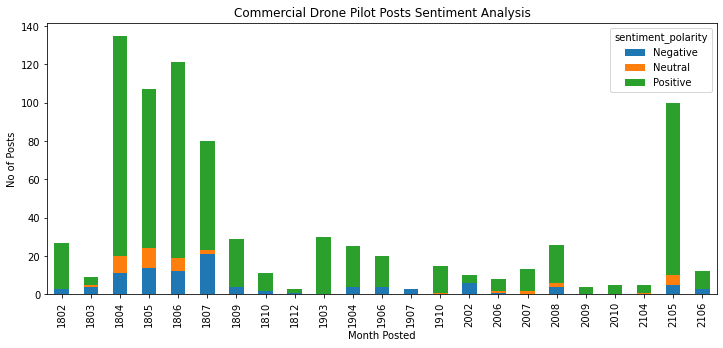

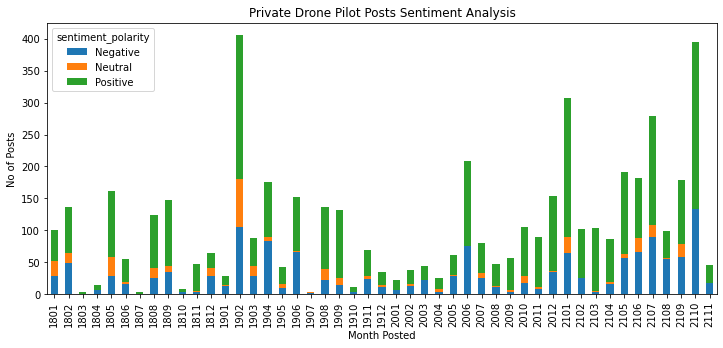

In [149]:
dfCommExcl1801 = dfCommercial[dfCommercial["post_YYMM"]>1801]
dfSIComm = dfCommExcl1801.groupby('post_YYMM')['sentiment_polarity'].value_counts().unstack(level=1)
dfSIComm.plot.bar(stacked=True, title='Commercial Drone Pilot Posts Sentiment Analysis', ylabel='No of Posts',
         xlabel='Month Posted', figsize=(12, 5))

dfSIPriv = dfPrivate.groupby('post_YYMM')['sentiment_polarity'].value_counts().unstack(level=1)
dfSIPriv.plot.bar(stacked=True, title='Private Drone Pilot Posts Sentiment Analysis', ylabel='No of Posts',
         xlabel='Month Posted', figsize=(12, 5))
